# Relative error distribution for the microbenchmarks

In [1]:
#import the libraries
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# run the parser.py
%run ./parse_data.py

int - execution_units percentage of inf/nan 0.0
int - pipeline percentage of inf/nan 0.0
int - scheduler percentage of inf/nan 0.0
float - execution_units percentage of inf/nan 0.11023754703206601
float - pipeline percentage of inf/nan 0.05260964683821234
float - scheduler percentage of inf/nan 0.27692307692307694


In [3]:
# final_df contains all the min, max, and median relative errors extracted from the configurations
final_df

,precision,error_site,micro,input_type,min_relative_error,max_relative_error,median_relative_error
0,int,execution_units,IADD,small,3.492140e-10,1.000000e+00,0.000549
1,int,execution_units,IADD,common,2.686507e-10,1.071429e+00,0.000366
2,int,execution_units,IADD,big,3.492620e-10,1.000000e+00,0.000366
3,int,execution_units,IMUL,small,9.155274e-05,7.500001e-01,0.375000
4,int,execution_units,IMUL,common,9.155274e-05,7.500001e-01,0.375000
...,...,...,...,...,...,...,...
67,float,scheduler,FSIN,common,1.000000e+00,1.000000e+00,1.000000
68,float,scheduler,FSIN,big,1.000000e+00,2.273943e+03,2273.942807
69,float,scheduler,FEXP,small,1.000000e+00,3.298535e+12,1.000000
70,float,scheduler,FEXP,common,9.916271e-01,1.000000e+00,1.000000


If you want to plot the histogram of the relative errors as in the paper

In [4]:
# Let's load the data for the scheduler
scheduler_df = pd.read_csv("data/raw_data_execution_units.csv")
scheduler_df

,gold_value,output_value,micro,operation,error_site,precision,input_size,gold_value_parsed,output_value_parsed,diff_value,relative_diff
0,1083062515,1083062507,FADD,1,execution_units,float,small,4.444452e+00,4.444448e+00,3.814697e-06,8.583055e-07
1,1083062515,0,FADD,1,execution_units,float,small,4.444452e+00,0.000000e+00,4.444452e+00,1.000000e+00
2,1083062515,1085159667,FADD,1,execution_units,float,small,4.444452e+00,5.444452e+00,-1.000000e+00,2.249996e-01
3,1083062515,1082800371,FADD,1,execution_units,float,small,4.444452e+00,4.319452e+00,1.250000e-01,2.812495e-02
4,1083062515,1083063027,FADD,1,execution_units,float,small,4.444452e+00,4.444696e+00,-2.441406e-04,5.493155e-05
...,...,...,...,...,...,...,...,...,...,...,...
21079,4294966912,4291821184,IMAD,4,execution_units,int,big,4.294967e+09,4.291821e+09,3.145728e+06,7.324219e-04
21080,4294966912,2818571904,IMAD,4,execution_units,int,big,4.294967e+09,2.818572e+09,1.476395e+09,3.437500e-01
21081,4294966912,1426062976,IMAD,4,execution_units,int,big,4.294967e+09,1.426063e+09,2.868904e+09,6.679688e-01
21082,4294966912,1430257280,IMAD,4,execution_units,int,big,4.294967e+09,1.430257e+09,2.864710e+09,6.669922e-01


In [5]:
# If we want to select the values of FADD unit using the big input value
sc_fadd_big_df = scheduler_df[
    (scheduler_df.micro == "FADD") & (scheduler_df.input_size == "big") & (scheduler_df.precision == "float")
]
sc_fadd_big_df

,gold_value,output_value,micro,operation,error_site,precision,input_size,gold_value_parsed,output_value_parsed,diff_value,relative_diff
249,1346006484,1346006468,FADD,1,execution_units,float,big,1.251104e+10,1.251102e+10,1.638400e+04,1.309563e-06
250,1346006484,1346006492,FADD,1,execution_units,float,big,1.251104e+10,1.251105e+10,-8.192000e+03,6.547817e-07
251,1346006484,1346006480,FADD,1,execution_units,float,big,1.251104e+10,1.251104e+10,4.096000e+03,3.273909e-07
252,1346006484,1346006486,FADD,1,execution_units,float,big,1.251104e+10,1.251104e+10,-2.048000e+03,1.636954e-07
253,1346006484,1346006485,FADD,1,execution_units,float,big,1.251104e+10,1.251104e+10,-1.024000e+03,8.184772e-08
...,...,...,...,...,...,...,...,...,...,...,...
1371,1361069660,1361069668,FADD,4,execution_units,float,big,4.302345e+10,4.302348e+10,-3.276800e+04,7.616312e-07
1372,1361069660,1361069656,FADD,4,execution_units,float,big,4.302345e+10,4.302343e+10,1.638400e+04,3.808156e-07
1373,1361069660,1358972508,FADD,4,execution_units,float,big,4.302345e+10,3.443352e+10,8.589935e+09,1.996570e-01
1374,1361069660,1361067612,FADD,4,execution_units,float,big,4.302345e+10,4.301506e+10,8.388608e+06,1.949776e-04


<AxesSubplot:>

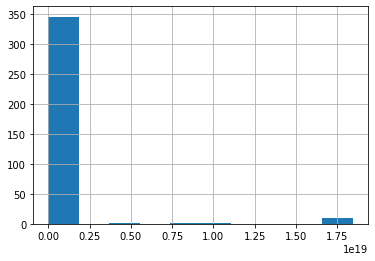

In [6]:
# Then plot the relative errors, as stated in the paper all the relative differences
# will follow a distribution similar to the following one
sc_fadd_big_df.relative_diff.abs().hist()